<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/KimJoug_unModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# Change working directory
%cd /content/drive/My Drive/Colab Notebooks/KimJong-unFaces

/content/drive/My Drive/Colab Notebooks/KimJong-unFaces


In [3]:
# Import libraries
import cv2
import numpy as np
import pickle
import dlib
import os
import matplotlib.pyplot as plt

# Config
%config InlineBackend.figure_format = 'retina' #Retina display

In [4]:
# Face detector from dlib
detector = dlib.get_frontal_face_detector()
shapePredictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
faceModel = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [5]:
# Create dataset with model prediction
faces = []
names = []
imagePath = os.path.join(os.getcwd(), 'train')

for imageFile in os.listdir(imagePath):
  if imageFile.endswith('.jpg'):
    image = cv2.imread(
        os.path.join(imagePath, imageFile)
    )[:, :, ::-1] #To RGB
    detects = detector(image, 2) #Scale can be changed
    for detect in detects:
      shape = shapePredictor(image, detect)
      face = faceModel.compute_face_descriptor(image, shape, 100)
      faces.append(face)
      names.append(imageFile[:imageFile.index('_')])

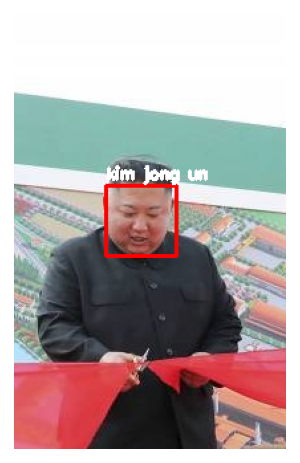

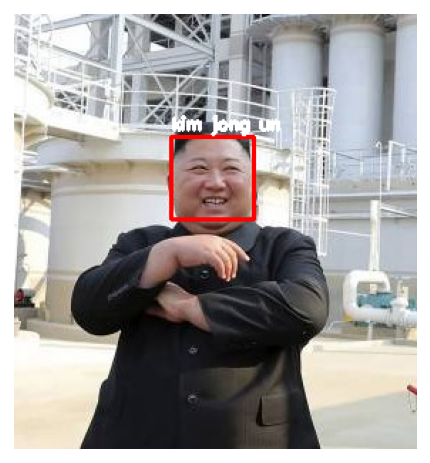

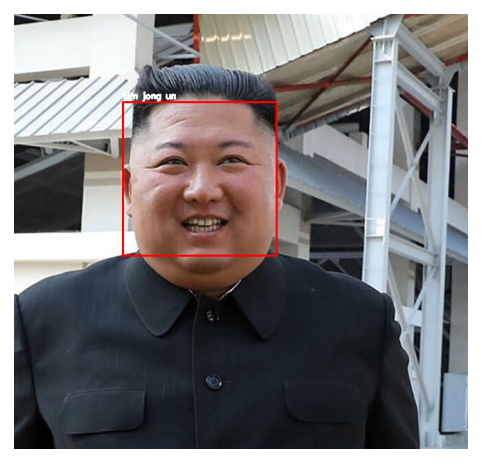

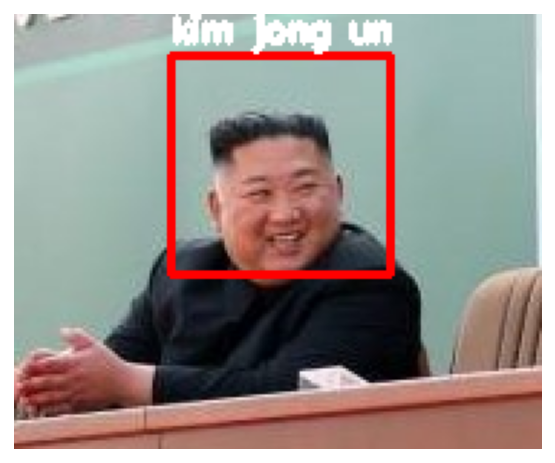

In [6]:
# Testing images
faceDetector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
testPath = os.path.join(os.getcwd(), 'test')

for imageFile in os.listdir(testPath):
  if imageFile.endswith('.jpg'):
    image = cv2.imread(
        os.path.join(testPath, imageFile)
    )
    faceDetects = faceDetector.detectMultiScale(image)
    for (x, y, w, h) in faceDetects:
      face = image[y - 10:y + h + 10, x - 10:x + w + 10][:, :, ::-1]
      detects = detector(face, 1) #Scale can be changed
      for detect in detects:
        shape = shapePredictor(face, detect)
        faceTest = faceModel.compute_face_descriptor(face, shape, 100)
        descriptors = []
        for descriptor in faces:
          descriptors.append(np.linalg.norm(np.array(descriptor) - np.array(faceTest)))
        descriptors = np.array(descriptors)
        idx = np.argmin(descriptors)
        if descriptors[idx] < 0.8:
          label = names[idx]
          cv2.rectangle(
              image,
              (x, y),
              (x + w, y + h),
              (0, 0, 255),
              2
          )
          cv2.putText(
              image,
              label,
              (x, y -5),
              cv2.FONT_HERSHEY_SIMPLEX,
              0.4,
              (255, 255, 255),
              2
          )
          plt.imshow(image[:, :, ::-1])
          plt.axis('off')
          plt.show()
        else:
          print('unknown')